## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [0]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


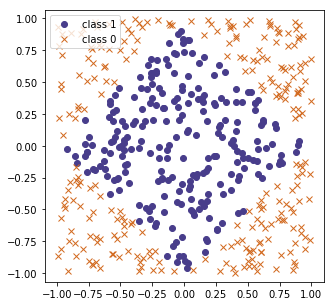

In [0]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [0]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16): # ATTENTION: for simplicity in the slides we use a different function!
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2): # ATTENTION: we use a slightly different network here with respect to that shown in the slides
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred # Logloss here = cross-entropy with softmax!
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [0]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = 
W_2 = 
num_iter = 
learning_rate = 
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    
    ## Update the weight matrices
    
    ### Compute the loss and accuracy

    ## Print the loss and accuracy for every 200th iteration
    
plot_loss_accuracy(loss_vals, accuracies)

## SOLUTION

[[ 0.99418856 -0.75357092 -0.75832505 -0.47211473]
 [ 0.62879649 -0.08697439 -0.01922903  0.41822771]
 [ 0.08359978  0.83675045  0.63690469 -0.59970683]]
iteration 0, log loss is 0.7997, accuracy is 0.514
iteration 200, log loss is 0.6796, accuracy is 0.55
iteration 400, log loss is 0.6638, accuracy is 0.602
iteration 600, log loss is 0.6216, accuracy is 0.654
iteration 800, log loss is 0.5482, accuracy is 0.754
iteration 1000, log loss is 0.5133, accuracy is 0.752
iteration 1200, log loss is 0.5001, accuracy is 0.754
iteration 1400, log loss is 0.4730, accuracy is 0.77
iteration 1600, log loss is 0.3884, accuracy is 0.882
iteration 1800, log loss is 0.3220, accuracy is 0.9
iteration 2000, log loss is 0.2869, accuracy is 0.91
iteration 2200, log loss is 0.2590, accuracy is 0.92
iteration 2400, log loss is 0.2382, accuracy is 0.928
iteration 2600, log loss is 0.2246, accuracy is 0.926
iteration 2800, log loss is 0.2151, accuracy is 0.928
iteration 3000, log loss is 0.2078, accuracy is 0

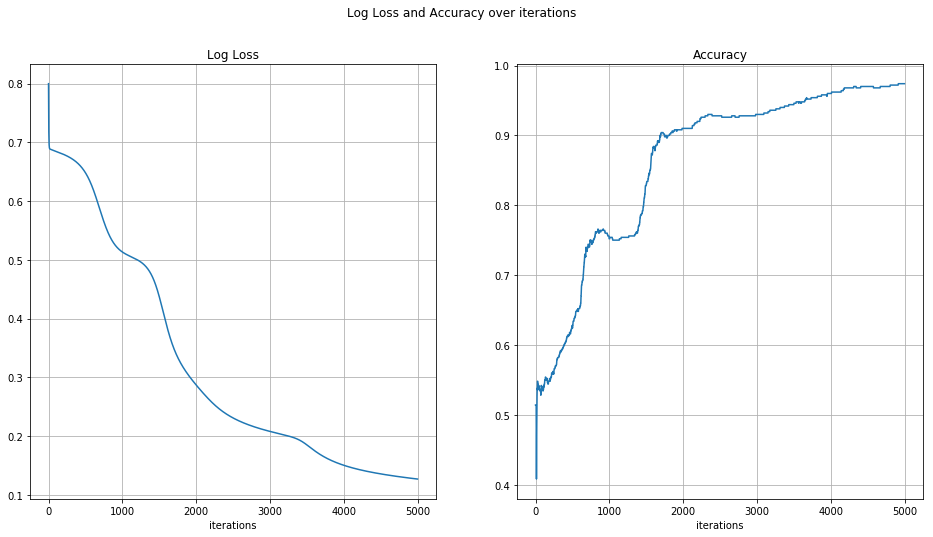

In [0]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
print(W_1)
W_1_for_NN = W_1.copy()
W_2 = np.random.uniform(-1,1,size=(4))
W_2_for_NN = W_2.copy()
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad 
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs # y_pred >= 0.5 considered as 1
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

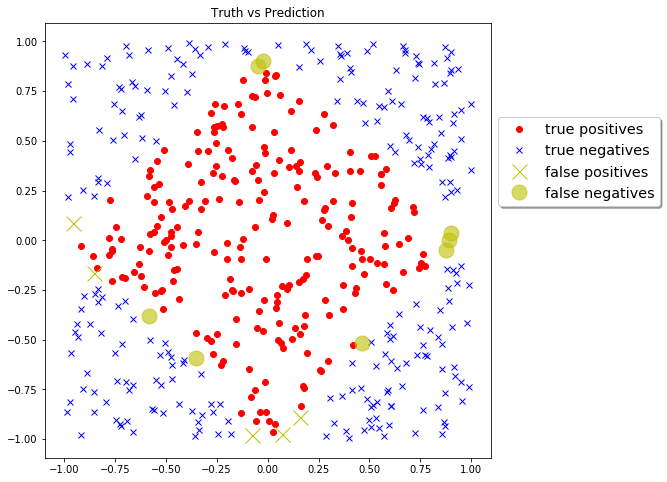

In [0]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

##Exercise

Let's try to implement a simple shallow neural network with 4 neurons in the hidden layer.

How many output neurons do we need?

##SOLUTION

In [0]:
import tensorflow as tf
from tensorflow.keras import layers

def my_init1(shape, dtype=None):
    return W_1_for_NN
def my_init2(shape, dtype=None):
    return W_2_for_NN.reshape(shape)

  
# Shallow NN with one hidden layer having 4 neurons with 3 input nodes (size of x) and 1 neuron in the output layer
model=tf.keras.Sequential()
model.add(layers.Dense(4,input_dim=3,activation='relu',use_bias=False,kernel_initializer=my_init1)) # We initialize the weights using the same matrices W_1 and W_2
model.add(layers.Dense(1,activation='sigmoid',use_bias=False,kernel_initializer=my_init2))


model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2000
500/500 - 0s - loss: 0.6870 - acc: 0.5140
Epoch 2/2000
500/500 - 0s - loss: 0.6865 - acc: 0.5140
Epoch 3/2000
500/500 - 0s - loss: 0.6861 - acc: 0.5140
Epoch 4/2000
500/500 - 0s - loss: 0.6857 - acc: 0.5140
Epoch 5/2000
500/500 - 0s - loss: 0.6852 - acc: 0.5140
Epoch 6/2000
500/500 - 0s - loss: 0.6848 - acc: 0.5140
Epoch 7/2000
500/500 - 0s - loss: 0.6844 - acc: 0.5140
Epoch 8/2000
500/500 - 0s - loss: 0.6840 - acc: 0.5140
Epoch 9/2000
500/500 - 0s - loss: 0.6836 - acc: 0.5140
Epoch 10/2000
500/500 - 0s - loss: 0.6832 - acc: 0.5140
Epoch 11/2000
500/500 - 0s - loss: 0.6828 - acc: 0.5140
Epoch 12/2000
500/500 - 0s - loss: 0.6824 - acc: 0.5140
Epoch 13/2000
500/500 - 0s - loss: 0.6820 - acc: 0.5140
Epoch 14/2000
500/500 - 0s - loss: 0.6816 - acc: 0.5140
Epoch 15/2000
500/500 - 0s - loss: 0.6812 - acc: 0.5140
Epoch 16/2000
500/500 - 0s - loss: 0.6808 - acc: 0.5140
Epoch 17/2000
500/500 - 0s - loss: 0.6805 - acc: 0.5140
Epoch 18/2000
500/500 - 0s - loss: 0.6801 - acc: 0.5140
E

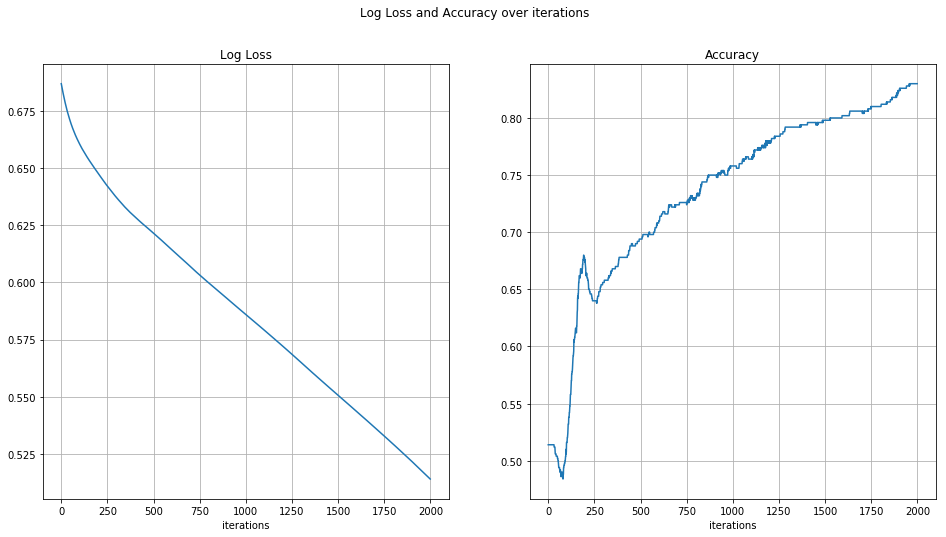

In [0]:
history = model.fit(x_mat, y,epochs=2000,verbose=2)

plot_loss_accuracy(history.history['loss'], history.history['acc'])
